## Численное решение уравнения диффузии.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
T = np.linspace(0, 10, n)
X = np.linspace(0, 10, n)
dt = T[1] - T[0]
dx = X[1] - X[0]

In [2]:
import numpy as np

# Assuming len(X) and len(T) are defined
C = np.zeros((len(T), len(X)))
C[0][7] = 1
C[0][2] = 1

alpha = 0.25


def calculate_next_C(t, i, alpha):
    return C[t][i] + alpha * (C[t][i + 1] + C[t][i - 1] - 2 * C[t][i])


for t in range(len(T) - 1):
    for x in range(1, len(X) - 1):
        C[t + 1][x] = calculate_next_C(t, x, alpha)

In [3]:
(alpha * dt / dx**2)

0.22499999999999998

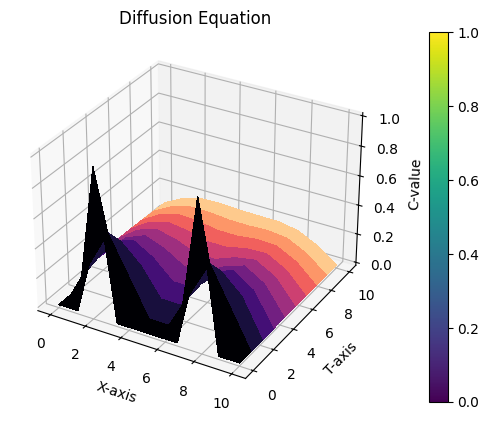

In [9]:
x, y = np.meshgrid(X, T)

fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

colors = plt.cm.magma((y - y.min()) / float((y - y.min()).max()))

surf = ax.plot_surface(
    x,
    y,
    np.array(C),
    rstride=1,
    cstride=1,
    facecolors=colors,
    linewidth=0,
    antialiased=False,
    shade=False,
)

ax.set_title("Diffusion Equation")
ax.set_xlabel("X-axis")
ax.set_ylabel("T-axis")
ax.set_zlabel("C-value")

fig.colorbar(surf, ax=ax, pad=0.1, aspect=20)

plt.show()


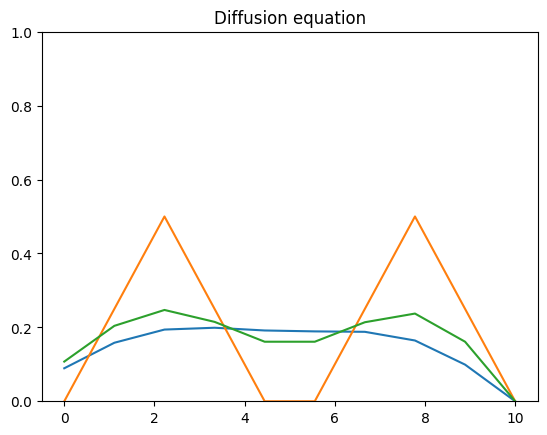

In [5]:
graph, (plot1) = plt.subplots(1, 1)

plot1.plot(X, C[9])
plot1.plot(X, C[1])
plot1.plot(X, C[5])

plot1.set_ylim(0, 1)
plot1.set_title("Diffusion equation")

plt.show()